# Multi-Label Classification

## 1. EDA

In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

In [2]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
#printmd('**bold**')

In [3]:
data_path = "archive (3)/train.csv"

In [4]:
data_raw = pd.read_csv(data_path)
#data_raw = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data_raw.shape

(159571, 8)

In [5]:
# print("Number of rows in data =",data_raw.shape[0])
# print("Number of columns in data =",data_raw.shape[1])
# print("\n")
# printmd("**Sample data:**")
data_raw.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


### 1.1. Calculating number of comments under each label

In [7]:
# Comments with no label are considered to be clean comments.
# Creating seperate column in dataframe to identify clean comments.


rowSums = data_raw.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(data_raw))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(data_raw)-clean_comments_count))

Total number of comments =  159571
Number of clean comments =  143346
Number of comments with labels = 16225


In [8]:
categories = list(data_raw.columns.values)
categories = categories[2:]
print(categories)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [9]:
# Calculating number of comments in each category

counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


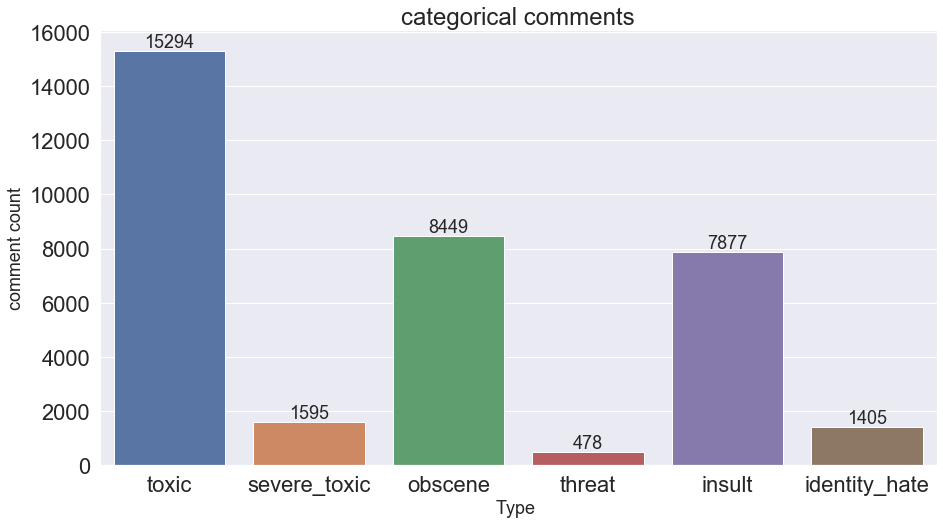

In [10]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, data_raw.iloc[:,2:].sum().values)

plt.title("categorical comments", fontsize=24)
plt.ylabel('comment count', fontsize=18)
plt.xlabel('Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

### 1.3. Calculating number of comments having multiple labels

c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


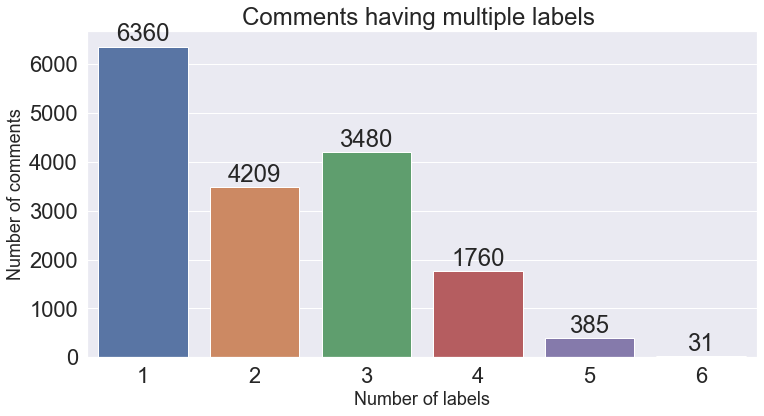

In [11]:
rowSums = data_raw.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(12,6))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

### 1.4. WordCloud representation of most used words in each category of comments

In [12]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

<Figure size 2880x1800 with 0 Axes>

<Figure size 2880x1800 with 0 Axes>

#### toxic

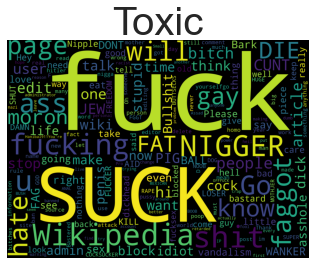

In [13]:

subset = data_raw[data_raw.toxic==1]
text = subset.comment_text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

# plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Toxic",fontsize=40)
plt.imshow(cloud_toxic)

#### severe toxic

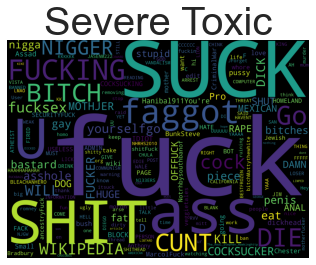

In [14]:
# severe_toxic
subset = data_raw[data_raw.severe_toxic==1]
text = subset.comment_text.values
cloud_severe_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

# plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Severe Toxic",fontsize=40)
plt.imshow(cloud_severe_toxic)

#### Obscene

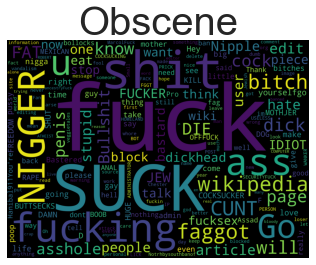

In [15]:
subset = data_raw[data_raw.obscene==1]
text = subset.comment_text.values
cloud_obscene = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

# plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("Obscene",fontsize=40)
plt.imshow(cloud_obscene)

#### threat

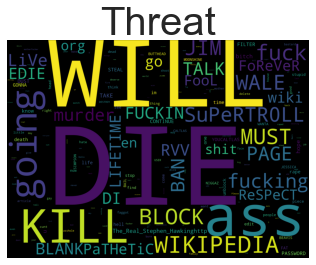

In [16]:

subset = data_raw[data_raw.threat==1]
text = subset.comment_text.values
cloud_threat = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

# plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Threat",fontsize=40)
plt.imshow(cloud_threat)

#### insult

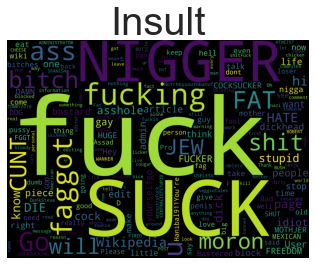

In [17]:
subset = data_raw[data_raw.insult==1]
text = subset.comment_text.values
cloud_insult = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

# plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("Insult",fontsize=40)
plt.imshow(cloud_insult)

#### indentity hate

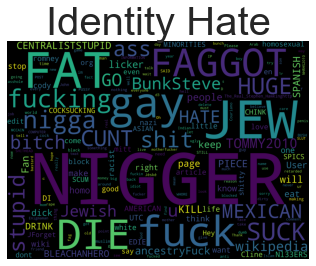

In [18]:
subset = data_raw[data_raw.identity_hate==1]
text = subset.comment_text.values
cloud_identity_hate = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

# plt.subplot(2, 3, 6)
plt.axis('off')
plt.title("Identity Hate",fontsize=40)
plt.imshow(cloud_identity_hate)

plt.show()

## 2. Data Pre-Processing

In [19]:
data = data_raw
data = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data.shape

(2000, 8)

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

### 2.1. Cleaning Data

In [21]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [22]:
data['comment_text'] = data['comment_text'].str.lower()
data['comment_text'] = data['comment_text'].apply(cleanHtml)
data['comment_text'] = data['comment_text'].apply(cleanPunc)
data['comment_text'] = data['comment_text'].apply(keepAlpha)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
5920,0fd108ce961278a6,barnstar of awesome barnstar of awesome you ar...,0,0,0,0,0,0
15290,286244bb924291e4,dandelion art ive added the template to the ar...,0,0,0,0,0,0
134830,d11df28838beb81a,current status of dangelico guitars could some...,0,0,0,0,0,0
28960,4cbdfda09c085593,discrepancies list of wars current image map ...,0,0,0,0,0,0
44374,76840dbd08cff0cf,there is a copy here http seattletimes nwsour...,0,0,0,0,0,0


### 2.2. Removing Stop Words

In [23]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['comment_text'] = data['comment_text'].apply(removeStopWords)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
5920,0fd108ce961278a6,barnstar awesome barnstar awesome hereby a...,0,0,0,0,0,0
15290,286244bb924291e4,dandelion art ive added template article da...,0,0,0,0,0,0
134830,d11df28838beb81a,current status dangelico guitars could someon...,0,0,0,0,0,0
28960,4cbdfda09c085593,discrepancies list wars current image map s...,0,0,0,0,0,0
44374,76840dbd08cff0cf,copy http seattletimes nwsource com html ...,0,0,0,0,0,0


### 2.3. Stemming

In [24]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['comment_text'] = data['comment_text'].apply(stemming)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
5920,0fd108ce961278a6,barnstar awesom barnstar awesom herebi award b...,0,0,0,0,0,0
15290,286244bb924291e4,dandelion art ive ad templat articl dandelion ...,0,0,0,0,0,0
134830,d11df28838beb81a,current status dangelico guitar could someon k...,0,0,0,0,0,0
28960,4cbdfda09c085593,discrep list war current imag map site ongo ar...,0,0,0,0,0,0
44374,76840dbd08cff0cf,copi http seattletim nwsourc com html nationwo...,0,0,0,0,0,0


### 2.4. Train-Test Split

In [25]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(1400, 8)
(600, 8)


In [26]:
train_text = train['comment_text']
test_text = test['comment_text']

### 2.5. TF-IDF

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(ngram_range=(1, 3), strip_accents='unicode')

In [28]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['id','comment_text'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['id','comment_text'], axis=1)

In [29]:
y_test.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
13518,0,0,0,0,0,0
93694,0,0,0,0,0,0
158680,0,0,0,0,0,0
136399,0,0,0,0,0,0
5763,0,0,0,0,0,0


## 3. Multi-Label Classification

### 3.1. Multiple Binary Classifications - (One Vs Rest Classifier)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [31]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing toxic comments...**
Test accuracy is 0.9066666666666666


**Processing severe_toxic comments...**
Test accuracy is 0.99


**Processing obscene comments...**
Test accuracy is 0.945


**Processing threat comments...**
Test accuracy is 0.9983333333333333


**Processing insult comments...**
Test accuracy is 0.945


**Processing identity_hate comments...**
Test accuracy is 0.9916666666666667


Wall time: 3.79 s


### 3.2. Multiple Binary Classifications - (Binary Relevance)

In [32]:
%%time

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier

classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.8883333333333333


Wall time: 16.3 s


### 3.3. Classifier Chains

In [33]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [60]:
%%time

# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.9016666666666666


Wall time: 15.9 s


### 3.4. Label Powerset

In [35]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset

In [57]:
%%time

# initialize label powerset multi-label classifier2
classifier2 = LabelPowerset(LogisticRegression())

# train
classifier2.fit(x_train, y_train)

# predict
predictions = classifier2.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.9


Wall time: 13.9 s


In [71]:
l = ["shut up and fuck you"]

out_test = classifier.predict_proba(vectorizer.transform(l))
out_tag = classifier.predict(vectorizer.transform(l))
print(out_test) 

  (0, 0)	0.5060167133392754
  (0, 1)	0.11505221636683283
  (0, 2)	0.6412979784402414
  (0, 3)	0.014588198459525224
  (0, 4)	0.7821609693105249
  (0, 5)	0.08972064996407272


In [72]:
out = str(out_test)

In [73]:
out =  out.strip().split(' ')
out
k = len(out)-1
final = dict()
count = 6
while k>0:
    final[count]= float(out[k][3:-2])
    k-=3
    count-=1
print(final)
    
    


{6: 0.089720649964072, 5: 0.782160969310524, 4: 0.01458819845952522, 3: 0.641297978440241, 2: 0.1150522163668328, 1: 0.506016713339275}


In [74]:
ma = 0
lab = 0
for i in range(1,7):
    if ma<final[i]:
        ma =final[i]
        lab  = i


In [75]:
lab

5

In [80]:
cate = {1:'toxic',2:'severe toxic',3:'obscene',4:'threat',5:'insult',6:'identity_hate'}
label_list = []
for i in range(1,7):
    label_list.append(final[i])

In [ ]:
import matplotlib.pyplot as plt
def plot_graph(arr):
    l = [cate[x] for x in range(1,len(arr)+1)]
    sns.set(font_scale = 2)
    plt.figure(figsize=(12,6))

    ax = plt.bar(l,arr)

    plt.title("probability difference wrt each class")
    plt.ylabel('problability diff for each class')
    plt.xlabel('Number of labels')
    plt.show()


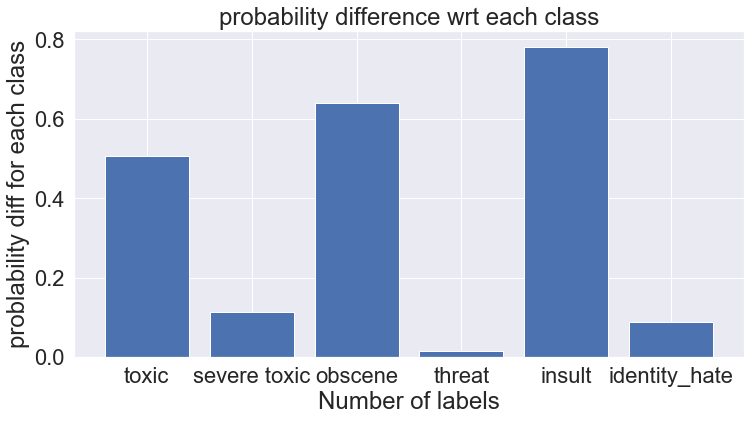

In [81]:
plot_graph(label_list)

In [77]:
label_dict

{'toxic': 0.506016713339275,
 'severe toxic': 0.1150522163668328,
 'obscene': 0.641297978440241,
 'threat': 0.01458819845952522,
 'insult': 0.782160969310524,
 'identity_hate': 0.089720649964072}

{6: 0.089720649964072, 5: 0.782160969310524, 4: 0.01458819845952522, 3: 0.641297978440241, 2: 0.1150522163668328, 1: 0.506016713339275}
heat level 3 in insult
[0.27614425597124903, 0.6671087529436912, 0.1408629908702831, 0.7675727708509988, 0.0, 0.692440319346452]


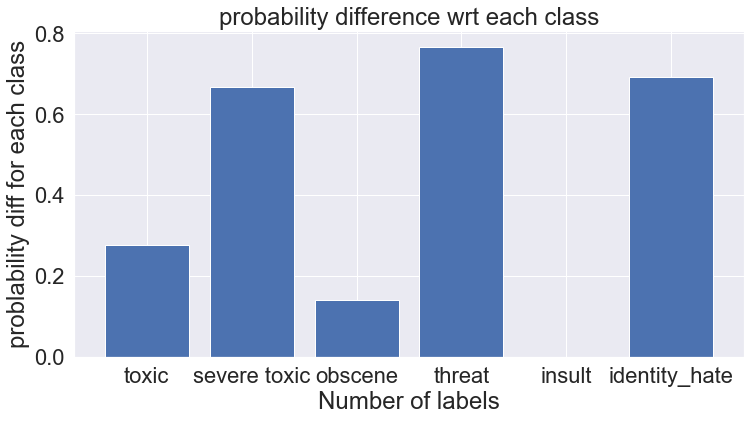

high heat in the given sentence


In [85]:

def heat(output):
    out = str(output)
    out =  out.strip().split(' ')
    out
    k = len(out)-1
    final = dict()
    count = 6
    while k>0:
        final[count]= float(out[k][3:-2])
        k-=3
        count-=1
    print(final)
    
    sev_50 = final[lab]/0.5
    if sev_50>1:
        sev_75 = final[lab]/0.75
        if sev_75>1:
            print('heat level 3 in',cate[lab])
        else:
            print('heat level 2 in',cate[lab])
    else:
        print('heat level 1 in',cate[lab])

    diff_matric = [0,0,0,0,0,0]
    for i in range(0,6):
        diff_matric[i]= final[lab] - final[i+1]
    fl = 0
    print(diff_matric)
    plot_graph(diff_matric)
    for i in range(0,6):
        if diff_matric[i]>0.5:
            fl += 1
    if fl<=3:
        print('high heat in the given sentence')
    else:
        print('mild heat in the given sentence')
heat(out_test)
